In [40]:
import pandas as pd

# 1)
weekly = pd.read_csv("Weekly.csv")

In [41]:
# 2)
weekly.head()

# Der Datensatz enthält Daten über den Aktienmarkt
# Year = Jahr in dem gehandelt wurde
# Lag1 - Lag5 = Rendite im Vergleich zu den vorherigen Wochen
# Volume = Wie viel in dieser Woche gehandelt wurde
# Today = Um wie viel sich das gehandelte Volume im Vergleich zu den letzten Wochen geändert hat
# Direction = Ob das gehandelte Volume Stieg oder Sank seit letzter Woche


,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# 3)
X = weekly[['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']]
y = weekly['Direction']
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.5, train_size=0.5, random_state=0)

model = LogisticRegression()
model.fit(X=train_X, y=train_y)

LogisticRegression()

In [43]:
from sklearn.metrics import confusion_matrix

# 4)
y_true = test_y
y_pred = model.predict(X=test_X)
prediction = confusion_matrix(y_true, y_pred, labels=["Up", "Down"])

In [44]:
# 5)

print(prediction)

tn, fp, fn, tp = prediction.ravel()

true_prediction = tp + tn
total_prediction = tp + fn + fp + tn

accuracy = true_prediction / total_prediction

positives = tp + fp
precision = tp / positives

real_positiv = tp + fn
recall = tp / real_positiv

print("Accuracy: " + str(accuracy))
print("Precision: " + str(precision))
print("Recall: " + str(recall))

[[230  81]
 [171  63]]
Accuracy: 0.5376146788990825
Precision: 0.4375
Recall: 0.2692307692307692


In [45]:
# 6)

# Basierend auf diesen Metriken wäre es nicht empfehlenswert,
# sich allein auf dieses Modell zu verlassen,
# wenn man auf Kursgewinne setzen möchte.
# Die Precision und Recall sind relativ niedrig,
# was darauf hinweist, dass das Modell Schwierigkeiten hat,
# positive Fälle korrekt zu identifizieren.


In [46]:
# 7)

X = weekly[['Lag2']]
y = weekly[['Direction']]
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.5, train_size=0.5, random_state=0)

new_model = LogisticRegression()
new_model.fit(X=train_X, y=train_y)

/usr/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

-1.5590885630134272


/usr/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


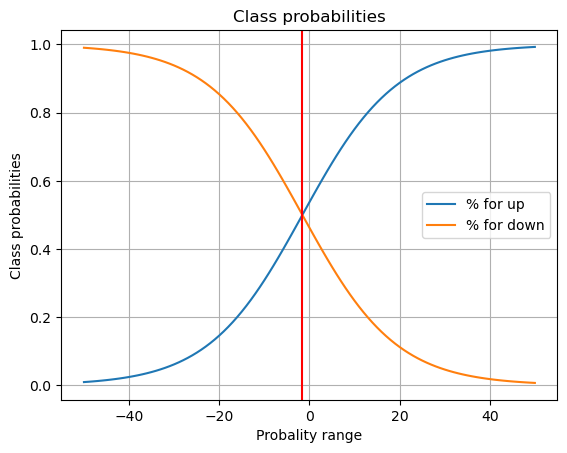

In [58]:
from matplotlib import pyplot as plt
import numpy as np
# 8)

prop_range = np.arange(-50,51)
class_prob = new_model.predict_proba(prop_range.reshape(-1,1))

prop_range.max()
prop_up = class_prob[:, 1]
prop_down = class_prob[:, 0]

plt.figure()
plt.plot(prop_range, prop_up, label="% for up")
plt.plot(prop_range, prop_down, label="% for down")
plt.xlabel("Probality range")
plt.ylabel("Class probabilities")
plt.title("Class probabilities")
plt.legend()
plt.grid(True)

# 9)

w1 = new_model.coef_[0][0]
w0 = new_model.intercept_[0]

# w1*x + w0 = y
# w1*x + w0 = 0 <-> -w0 / w1 = x
decision_boundary = -w0 / w1

print(decision_boundary)
plt.axvline(decision_boundary, color='red', label='Decision boundary')
plt.show()

# Prozentuale Rendite > -1.56 => Die Wahrscheinlichkeit für ein wachsen der Aktie steigt
# Prozentuale Rendite < -1.56 => Die Wahrscheinlichkeit für ein sinken der Aktie steigt